> ## **Machine Learning Project:** Credit Card Fraud Detection ##

We will begin by importing the necessary libraries and loading the dataset. We will then explore the dataset and visualize the data and then finally build a model to predict fraudulent transactions. We will also look at the performance of the model and ways to improve it. 

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np
import seaborn as sns

In [285]:
Train_Data = pd.read_csv('fraudTrain.csv')
Test_Data = pd.read_csv('fraudTest.csv')

Now that we have imported the data, lets check if the data has been successfully imported. We will visualise our data to inspect it for any discrepancies.

In [286]:
Train_Data.shape

(1296675, 23)

In [287]:
Test_Data.shape

(555719, 23)

In [288]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [289]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [290]:
Train_Data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [291]:
Test_Data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [292]:
Train_Data.isna().sum() 

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [293]:
Test_Data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [294]:
Train_Data.duplicated().sum()

0

In [295]:
Test_Data.duplicated().sum()

0

As there are no missing or duplicate values so we dont need to perform any operations to remove them.

In [296]:
Train_Data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [297]:
Test_Data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [298]:
Train_Data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [299]:
Test_Data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


It can be seen that there is the unnecessary column 'Unnamed: 0' which is the index of the dataframe. We will remove this column as it is not required. It can cause problems in the future.

In [300]:
Train_Data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [301]:
Test_Data.drop(['Unnamed: 0'], axis=1, inplace=True)

Now, I didn't like the column heading 'is_fraud' so I changed its name to simply 'Fraud'. Which looks much better and the data is also easier to read.

In [302]:
Train_Data['Fraud'] = Train_Data['is_fraud']
Test_Data['Fraud'] = Test_Data['is_fraud']

Train_Data.drop(['is_fraud'], axis=1, inplace=True)
Test_Data.drop(['is_fraud'], axis=1, inplace=True)

In [303]:
Train_Data.head()
Test_Data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,Fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Further, I changed the headings of two more columns 'trans_date_trans_time' and the 'dob'.

In [304]:
Train_Data = Train_Data.rename(columns={'trans_date_trans_time': 'Date & Time'})
Test_Data = Test_Data.rename(columns={'trans_date_trans_time': 'Date & Time'})

Train_Data = Train_Data.rename(columns={'dob': 'DOB'})
Test_Data = Test_Data.rename(columns={'dob': 'DOB'})



In [305]:
Train_Data.head()

,Date & Time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,DOB,trans_num,unix_time,merch_lat,merch_long,Fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [306]:
Train_Data.dtypes

Date & Time     object
cc_num           int64
merchant        object
category        object
amt            float64
first           object
last            object
gender          object
street          object
city            object
state           object
zip              int64
lat            float64
long           float64
city_pop         int64
job             object
DOB             object
trans_num       object
unix_time        int64
merch_lat      float64
merch_long     float64
Fraud            int64
dtype: object

In [307]:
Test_Data.dtypes

Date & Time     object
cc_num           int64
merchant        object
category        object
amt            float64
first           object
last            object
gender          object
street          object
city            object
state           object
zip              int64
lat            float64
long           float64
city_pop         int64
job             object
DOB             object
trans_num       object
unix_time        int64
merch_lat      float64
merch_long     float64
Fraud            int64
dtype: object

Now, we will move on to visualising the data. We will first look at the distribution of the target variable 'Fraud'. We will plot a pie chart to see the distribution of the target variable.

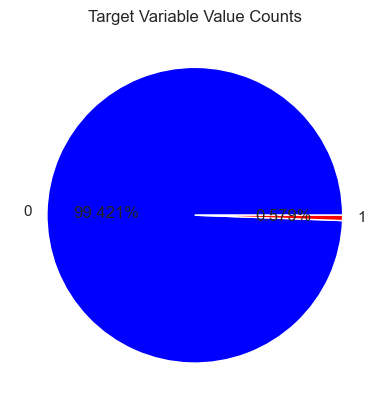

In [308]:
labels = Train_Data.Fraud.unique()

# get the count of each class
sizes = Train_Data.Fraud.value_counts().values

# set the colors for the pie chart
colors = ['Blue', 'Red']

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%', colors=colors)
ax.set_title('Target Variable Value Counts')
plt.show()


As we can see, that a majority of our data is non-fraudulent. This is quite common in fraud detection problems. The indicators that we can easily manipulate are the numeric ones, as they can be normalised and regularised. So we decide to only use them for our model. Before removal of the non-numeric datatypes we normalise the numeric data.

In [309]:
# create a copy of the Train_Data DataFrame
tr_data = Train_Data.copy()

# select the columns with datetime, float64, and int64 data types
cols_to_scale = tr_data.select_dtypes(include=['float64']).columns

# convert the datetime columns to a numerical representation
for col in cols_to_scale:
    if pd.api.types.is_datetime64_any_dtype(tr_data[col]):
        tr_data[col] = tr_data[col].astype('int64') / 10**9

# create a StandardScaler instance
scaler = StandardScaler()

# fit the scaler on the selected columns
scaler.fit(tr_data[cols_to_scale])

# transform the selected columns
tr_data[cols_to_scale] = scaler.transform(tr_data[cols_to_scale])

# display the resulting DataFrame
print(tr_data.head())

           Date & Time            cc_num                            merchant  \
0  2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1  2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2  2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3  2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4  2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category       amt      first     last gender  \
0       misc_net -0.407826   Jennifer    Banks      F   
1    grocery_pos  0.230039  Stephanie     Gill      F   
2  entertainment  0.934149     Edward  Sanchez      M   
3  gas_transport -0.158132     Jeremy    White      M   
4       misc_pos -0.177094      Tyler   Garcia      M   

                         street            city  ...       lat      long  \
0                561 Perry Cove  Moravian Falls  ... -0.484420  0.657620   
1  43039 Riley Greens Su

In [310]:
# create a copy of the Train_Data DataFrame
te_data = Test_Data.copy()

# select the columns with datetime, float64, and int64 data types
cols_to_scale = te_data.select_dtypes(include=['float64']).columns

# convert the datetime columns to a numerical representation
for col in cols_to_scale:
    if pd.api.types.is_datetime64_any_dtype(te_data[col]):
        te_data[col] = te_data[col].astype(int) / 10**9

# create a StandardScaler instance
scaler = StandardScaler()

# fit the scaler on the selected columns
scaler.fit(te_data[cols_to_scale])

# transform the selected columns
te_data[cols_to_scale] = scaler.transform(te_data[cols_to_scale])

# display the resulting DataFrame
print(te_data.head())

           Date & Time            cc_num  \
0  2020-06-21 12:14:25  2291163933867244   
1  2020-06-21 12:14:33  3573030041201292   
2  2020-06-21 12:14:53  3598215285024754   
3  2020-06-21 12:15:15  3591919803438423   
4  2020-06-21 12:15:17  3526826139003047   

                               merchant        category       amt   first  \
0                 fraud_Kirlin and Sons   personal_care -0.424463    Jeff   
1                  fraud_Sporer-Keebler   personal_care -0.252337  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness -0.179353  Ashley   
3                     fraud_Haley Group        misc_pos -0.059605   Brian   
4                 fraud_Johnston-Casper          travel -0.422358  Nathan   

       last gender                       street        city  ...       lat  \
0   Elliott      M            351 Darlene Green    Columbia  ... -0.904377   
1  Williams      F             3638 Marsh Union     Altonah  ...  0.351182   
2     Lopez      F         9333 Valent

In [311]:
# select the columns with object data type
cols_to_remove = tr_data.select_dtypes(include=['object']).columns

# drop the selected columns from the DataFrame
tr_data = tr_data.drop(cols_to_remove, axis=1)

# display the resulting DataFrame
print(tr_data.head())


             cc_num       amt    zip       lat      long  city_pop  \
0  2703186189652095 -0.407826  28654 -0.484420  0.657620      3495   
1      630423337322  0.230039  99160  2.039120 -2.033870       149   
2    38859492057661  0.934149  83252  0.717754 -1.601537      4154   
3  3534093764340240 -0.158132  59632  1.515617 -1.590766      1939   
4   375534208663984 -0.177094  24433 -0.023035  0.782279        99   

    unix_time  merch_lat  merch_long  Fraud  
0  1325376018  -0.494354    0.593864      0  
1  1325376044   2.078699   -2.030341      0  
2  1325376051   0.902849   -1.592323      0  
3  1325376076   1.662886   -1.621848      0  
4  1325376186   0.026941    0.841909      0  


In [312]:
# select the columns with object data type
cols_to_remove = te_data.select_dtypes(include=['object']).columns

# drop the selected columns from the DataFrame
te_data = te_data.drop(cols_to_remove, axis=1)

# display the resulting DataFrame
print(te_data.head())


             cc_num       amt    zip       lat      long  city_pop  \
0  2291163933867244 -0.424463  29209 -0.904377  0.677451    333497   
1  3573030041201292 -0.252337  84002  0.351182 -1.472454       302   
2  3598215285024754 -0.179353  11710  0.420768  1.216667     34496   
3  3591919803438423 -0.059605  32780 -1.970539  0.685934     54767   
4  3526826139003047 -0.422358  49632  1.128092  0.380004      1126   

    unix_time  merch_lat  merch_long  Fraud  
0  1371816865  -0.894145    0.657586      0  
1  1371816873   0.178126   -1.436610      0  
2  1371816893   0.383257    1.167640      0  
3  1371816915  -1.909485    0.680717      0  
4  1371816917   1.259139    0.316510      0  


Train and test data has already been seperated so now we would just assigned them to their respective variables. 

In [313]:
y_train = tr_data['Fraud']
X_train = tr_data.drop('Fraud', axis=1)

In [314]:
y_test = te_data['Fraud']
X_test = te_data.drop('Fraud', axis=1)


In [315]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1296675, 9) Y_train.shape= (1296675,)
X_test.shape= (555719, 9) Y_test.shape= (555719,)


Our first model is  ***Decision Tree Model***. We will use the Decision Tree Classifier to build our model. We will first train the model and then test it. We will then evaluate the model and see how it performs. 

In [316]:
Training_Weight = compute_sample_weight('balanced', y_train)

sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=4)

sklearn_pred = sklearn_dt.fit(X_train, y_train, sample_weight=Training_Weight)

sklearn_pred = sklearn_dt.predict(X_test)

One of the most popular methods to observe the performance of a classification model is to plot the confusion matrix. We will plot the confusion matrix for our model and observe the results.

In [317]:
def Confusion_Matrix(ConfMat, Categories, normalize=False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    if normalize:
        ConfMat = ConfMat.astype('float') / ConfMat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix Without Normalization')
    print(ConfMat)
    
    plt.imshow(ConfMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Categories))
    plt.xticks(tick_marks, Categories, rotation=45)
    plt.yticks(tick_marks, Categories)

    fmt = '.2f' if normalize else 'd'
    threshold = ConfMat.max() / 2.
    for i, j in itertools.product(range(ConfMat.shape[0]), range(ConfMat.shape[1])):
        plt.text(j, i, format(ConfMat[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfMat[i, j] > threshold else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

print(confusion_matrix(y_test, sklearn_pred, labels=[0,1]))

[[514847  38727]
 [   367   1778]]


In [318]:
# compute the confusion matrix
Conf_Matrix = confusion_matrix(y_test, sklearn_pred, labels=[0,1])
print(Conf_Matrix)

[[514847  38727]
 [   367   1778]]


In [319]:
np.set_printoptions(precision=3, suppress=True)

Confusion Matrix Without Normalization
[[514847  38727]
 [   367   1778]]


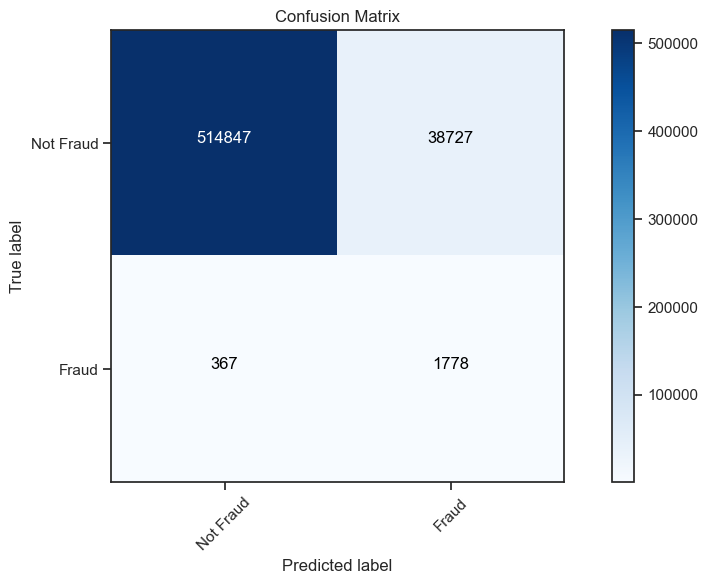

In [320]:
plt.figure(figsize=(10, 6))
Confusion_Matrix(Conf_Matrix, Categories= ['Not Fraud', 'Fraud'],normalize= False , title='Confusion Matrix', cmap='Blues')

The confusion matrix shows that our model is performing well. We have a high true positive and true negative rate. This means that our model is able to predict the fraudulent and non-fraudulent transactions correctly. Lets check our accuracy now.

In [321]:
# compute the accuracy score
acc = accuracy_score(y_test, sklearn_pred)
print('Accuracy:', acc)

Accuracy: 0.929651496529721


Seems pretty good. Almost 93% accuracy. But we can't be sure of the accuracy of our model just by looking at the accuracy score. We need to look at other metrics as well. Lets look at the classification report.

In [322]:
# compute the classification report
report = classification_report(y_test, sklearn_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.83      0.08      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.88      0.52    555719
weighted avg       1.00      0.93      0.96    555719



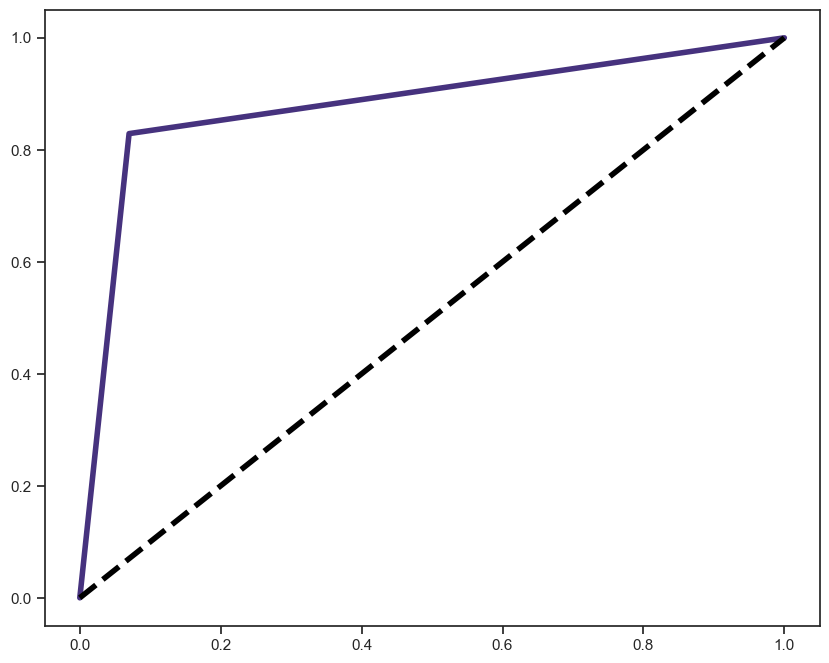

In [323]:
# compute the ROC AUC score
roc_auc = roc_auc_score(y_test, sklearn_pred)

# compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sklearn_pred)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

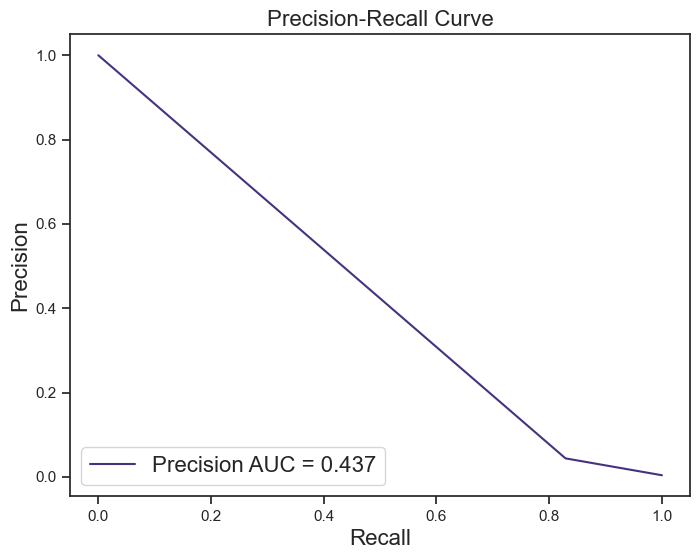

In [324]:
# compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, sklearn_pred)

# compute the AUC of the precision-recall curve
pr_auc = auc(recall, precision)

# plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision AUC = %0.3f' % pr_auc)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.show()

We are done with our first model. Now we will move on to our second model. We will use the **Logistic Regression** model to build our model. We will first train the model and then test it. We will then evaluate the model and see how it performs.

> ## **Algorithm**: Logistic Regression  ##

Same as before we will start by importing of libraries.

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, jaccard_score
import itertools
from imblearn.over_sampling import  SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

We will the method of SMOTE to oversample our data. We will then assign this sampled data to our variables.

In [326]:
# Apply resampling techniques
# Choose either RandomOverSampler or SMOTE
# ros = RandomOverSampler(random_state=42)
ros = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Our data has not bee normalised so we will do that now. We will use the StandardScaler to normalise our data. We will then assign the normalised data to our variables. 

In [327]:
# Apply preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Now we will fit our model to the training data and then test it. We will then evaluate the model and see how it performs.

In [328]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=42)

Lets make predictions with our model and see how it performs.

In [329]:
# Make predictions
yhat = model.predict(X_test_scaled)

In [361]:
yhat_prob = model.predict_proba(X_test_scaled)
yhat_prob

array([[0.911, 0.089],
       [0.875, 0.125],
       [0.865, 0.135],
       ...,
       [0.815, 0.185],
       [0.913, 0.087],
       [0.887, 0.113]])

In [331]:
jaccard_score(y_test, yhat, pos_label=0)

0.9630471151087057

96% accuracy. Seems pretty good. But we can't be sure of the accuracy of our model just by looking at the accuracy score. We need to look at other metrics as well.

In [332]:
def Confusion_Matrix(ConfMat, Categories, normalize=False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    if normalize:
        ConfMat = ConfMat.astype('float') / ConfMat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix Without Normalization')
    print(ConfMat)

    plt.imshow(ConfMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Categories))
    plt.xticks(tick_marks, Categories, rotation=45)
    plt.yticks(tick_marks, Categories)

    fmt = '.2f' if normalize else 'd'
    threshold = ConfMat.max() / 2.
    for i, j in itertools.product(range(ConfMat.shape[0]), range(ConfMat.shape[1])):
        plt.text(j, i, format(ConfMat[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfMat[i, j] > threshold else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [333]:
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[533635  19939]
 [   537   1608]]


In [334]:
# compute the confusion matrix
Conf_Matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(Conf_Matrix)

[[533635  19939]
 [   537   1608]]


In [335]:
np.set_printoptions(precision=3, suppress=True)

Confusion Matrix Without Normalization
[[533635  19939]
 [   537   1608]]


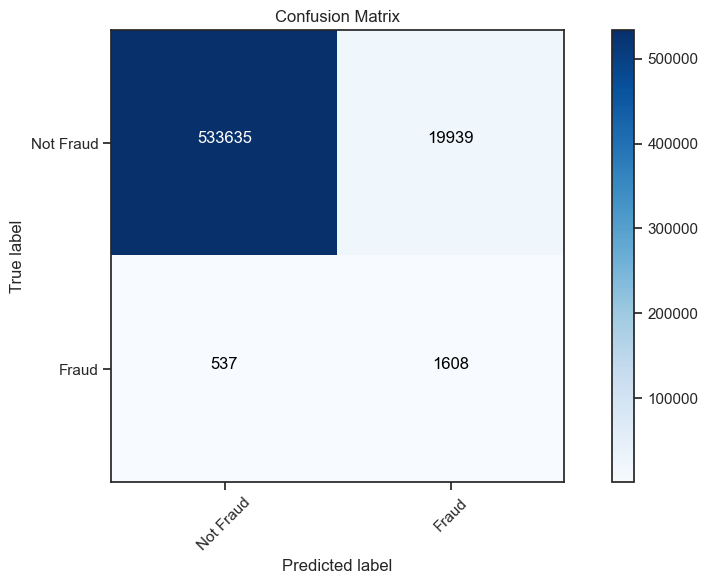

In [336]:
plt.figure(figsize=(10, 6))
Confusion_Matrix(Conf_Matrix, Categories= ['Not Fraud', 'Fraud'],normalize= False , title='Confusion Matrix', cmap='Blues')

In [337]:
# compute the accuracy score
acc = accuracy_score(y_test, yhat)
print('Accuracy:', acc)

Accuracy: 0.963154040081408


The model seems to be doing weel on true negatives but not as well on true positives as the previous model. Comparatively despite having lower accuracy the first model had greater true positive accuracy.

In [338]:
# compute the classification report
report = classification_report(y_test, yhat)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.75      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.86      0.56    555719
weighted avg       1.00      0.96      0.98    555719



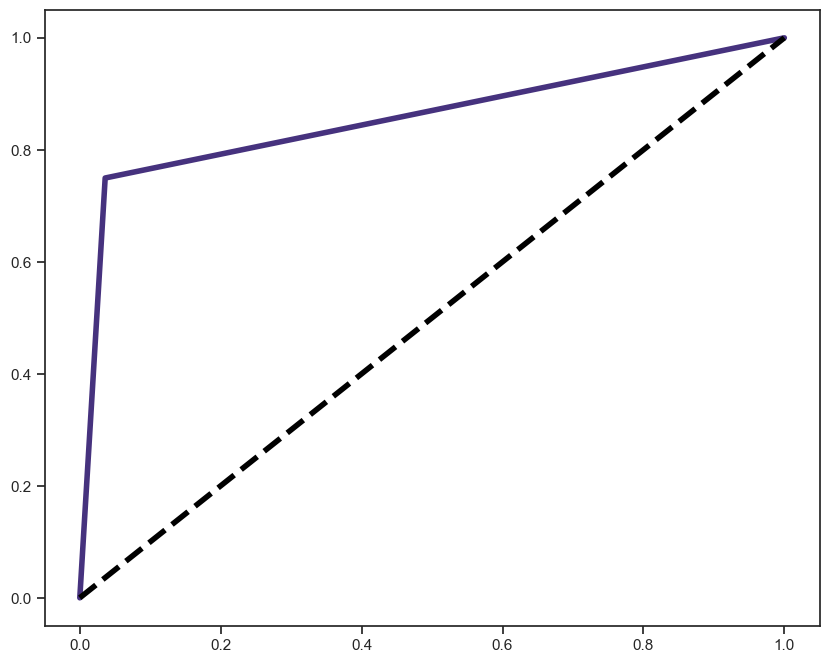

In [339]:
# compute the ROC AUC score
roc_auc = roc_auc_score(y_test, yhat)

# compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

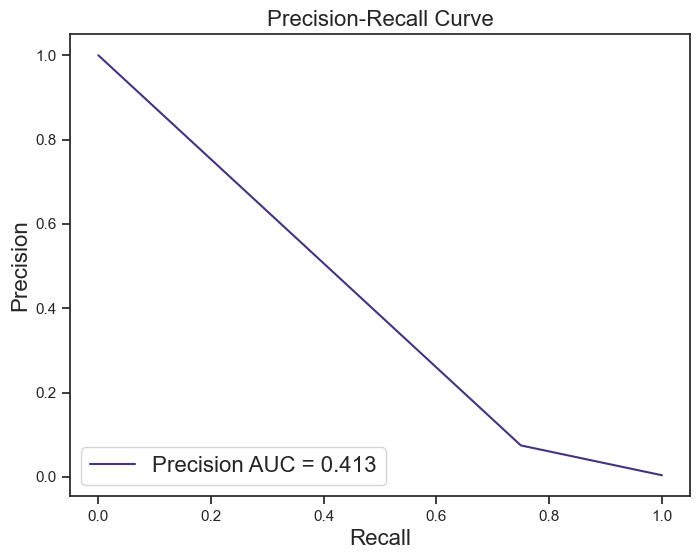

In [340]:
# compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# compute the AUC of the precision-recall curve
pr_auc = auc(recall, precision)

# plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision AUC = %0.3f' % pr_auc)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.show()

Congrats! We have successfully built two models to predict fraudulent transactions. We have also evaluated the performance of both the models. We have also seen that the Logistic Regression model performs better than the Decision Tree model. We have also seen that the Logistic Regression model has a higher accuracy than the Decision Tree model. However, true positive accuracy is higher in the Decision Tree model. 

> ## **Algorithm**: Support Vector Machine Model  ##

Most of the necessary libraries have already been imported. We will now import the SVM model from the sklearn library.

In [362]:
from sklearn.svm import LinearSVC

SMOTE and StandardScaler will be used to oversample and normalise the data respectively. We will then assign the sampled and normalised data to our variables. 

In [363]:
# Apply resampling techniques
# Choose either RandomOverSampler or SMOTE
# ros = RandomOverSampler(random_state=42)
ros = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [364]:
# Apply preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Now lets create a model variable and assign the SVM model to it. We will then fit the model to the training data and then test it. We will then evaluate the model and see how it performs.

In [365]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

In [367]:
sklearn_svm.fit(X_train_scaled, y_train_resampled)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [368]:
sklearn_svm_pred = sklearn_svm.predict(X_test_scaled)

In [369]:
jaccard_score(y_test, sklearn_svm_pred, pos_label=0)

0.9799782466355338

Almost 98% accuracy. Seems impressive but how useful is this model for us in detecting fraudulent transactions? Lets look at the confusion matrix.

In [370]:
def Confusion_Matrix(ConfMat, Categories, normalize=False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    if normalize:
        ConfMat = ConfMat.astype('float') / ConfMat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix Without Normalization')
    print(ConfMat)

    plt.imshow(ConfMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Categories))
    plt.xticks(tick_marks, Categories, rotation=45)
    plt.yticks(tick_marks, Categories)

    fmt = '.2f' if normalize else 'd'
    threshold = ConfMat.max() / 2.
    for i, j in itertools.product(range(ConfMat.shape[0]), range(ConfMat.shape[1])):
        plt.text(j, i, format(ConfMat[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfMat[i, j] > threshold else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [371]:
# compute the confusion matrix
Conf_Matrix = confusion_matrix(y_test, sklearn_svm_pred, labels=[0,1])
print(Conf_Matrix)

[[543297  10277]
 [   823   1322]]


In [372]:
np.set_printoptions(precision=3, suppress=True)

Confusion Matrix Without Normalization
[[543297  10277]
 [   823   1322]]


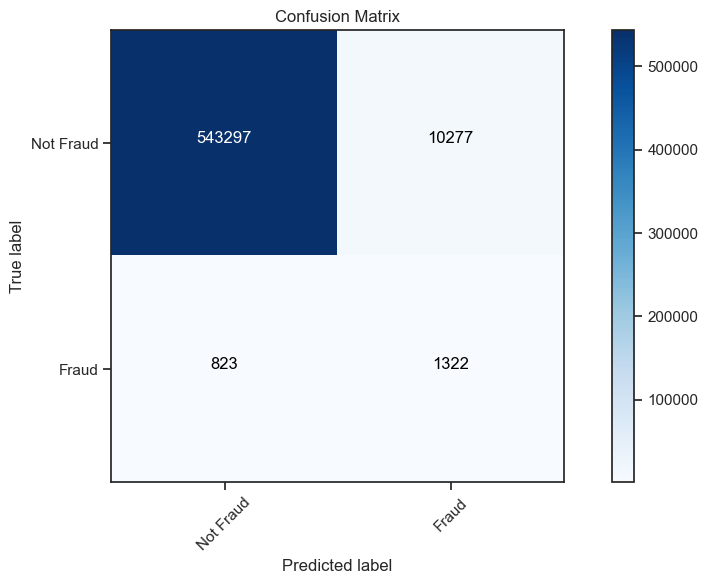

In [373]:
plt.figure(figsize=(10, 6))
Confusion_Matrix(Conf_Matrix, Categories= ['Not Fraud', 'Fraud'],normalize= False , title='Confusion Matrix', cmap='Blues')

So, despite having a 98% accuracy this model is even worse at detecting fraudulent transactions than the previous two models. It has the lowest true positive accuracy. This means that this model is not suitable for detecting fraudulent transactions. 

In [374]:
# compute the accuracy score
acc = accuracy_score(y_test, sklearn_svm_pred)
print('Accuracy:', acc)

Accuracy: 0.9800258763871669


In [375]:
# compute the classification report
report = classification_report(y_test, sklearn_svm_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.11      0.62      0.19      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.80      0.59    555719
weighted avg       1.00      0.98      0.99    555719



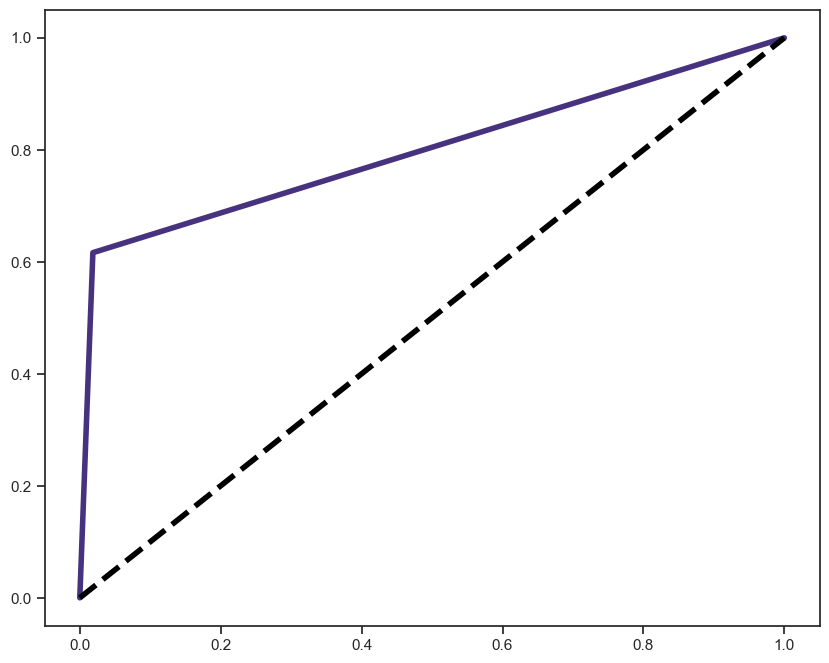

In [376]:
# compute the ROC AUC score
roc_auc = roc_auc_score(y_test, sklearn_svm_pred)

# compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sklearn_svm_pred)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

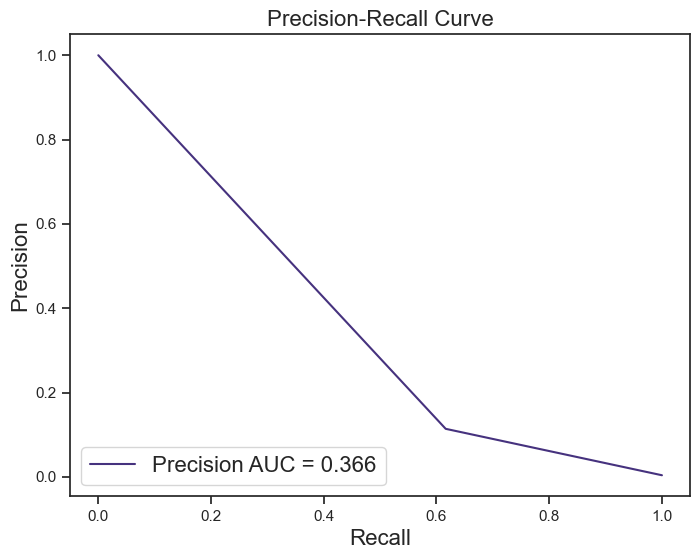

In [377]:
# compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, sklearn_svm_pred)

# compute the AUC of the precision-recall curve
pr_auc = auc(recall, precision)

# plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision AUC = %0.3f' % pr_auc)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.show()

Finally, we have completed our evaluation of the Credit Card Fraud Detection Project. We have successfully built three models to predict fraudulent transactions. We have also evaluated the performance of all the models. We have also seen that the Logistic Regression model performs better than the Decision Tree model. We have also seen that the Logistic Regression model has a higher accuracy than the Decision Tree model. However, true positive accuracy is higher in the Decision Tree model. We have also seen that the SVM model is not suitable for detecting fraudulent transactions. So comparing the Decision Tree and Logistic Regression models, we can say that the Logistic Regression model is the best model for detecting fraudulent transactions. However, the Decision Tree model is also a good model for detecting fraudulent transactions. 